# Simple Model
The aim of this workbook it to take an extremely simplified version of the model (just debris) and then build the equations and solve for them to ensure that the model is working correctly before implementing.

In [88]:
import dill as pickle
import sympy as sp
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import jit, prange
import os   

In [251]:
with open(os.path.join(os.getcwd(), '../../scenario_properties_long.pkl'), 'rb') as f:
    scenario_properties = pickle.load(f)

In [252]:
# Lambdafiying the equations
symbols = scenario_properties.all_symbolic_vars

# Convert to symbols
print(len(symbols)) # Should be 320 for a 40, 8 matrix
print(symbols)

equations_flattened = [scenario_properties.equations[i, j] for j in range(scenario_properties.equations.cols) for i in range(scenario_properties.equations.rows)]
# drag_flattened = [scenario_properties.full_drag[i, j] for j in range(scenario_properties.full_drag.cols) for i in range(scenario_properties.full_drag.rows)]
# pmd_flattened = [scenario_properties.full_Cdot_PMD[i, j] for j in range(scenario_properties.full_Cdot_PMD.cols) for i in range(scenario_properties.full_Cdot_PMD.rows)]
#collisions_flattened = [scenario_properties.full_coll[i, j] for j in range(scenario_properties.full_coll.cols) for i in range(scenario_properties.full_coll.rows)]

# Convert equations to lambda functions
equations = [sp.lambdify(symbols, eq, 'numpy') for eq in equations_flattened]
# full_drag = [sp.lambdify(symbols, eq, 'numpy') for eq in drag_flattened]
# full_pmd = [sp.lambdify(symbols, eq, 'numpy') for eq in pmd_flattened]
# full_coll = [sp.lambdify(symbols, eq, 'numpy') for eq in collisions_flattened]

600
[Su_260kg_1, Su_260kg_2, Su_260kg_3, Su_260kg_4, Su_260kg_5, Su_260kg_6, Su_260kg_7, Su_260kg_8, Su_260kg_9, Su_260kg_10, Su_260kg_11, Su_260kg_12, Su_260kg_13, Su_260kg_14, Su_260kg_15, Su_260kg_16, Su_260kg_17, Su_260kg_18, Su_260kg_19, Su_260kg_20, Su_260kg_21, Su_260kg_22, Su_260kg_23, Su_260kg_24, Su_260kg_25, Su_260kg_26, Su_260kg_27, Su_260kg_28, Su_260kg_29, Su_260kg_30, Su_260kg_31, Su_260kg_32, Su_260kg_33, Su_260kg_34, Su_260kg_35, Su_260kg_36, Su_260kg_37, Su_260kg_38, Su_260kg_39, Su_260kg_40, Su_473kg_1, Su_473kg_2, Su_473kg_3, Su_473kg_4, Su_473kg_5, Su_473kg_6, Su_473kg_7, Su_473kg_8, Su_473kg_9, Su_473kg_10, Su_473kg_11, Su_473kg_12, Su_473kg_13, Su_473kg_14, Su_473kg_15, Su_473kg_16, Su_473kg_17, Su_473kg_18, Su_473kg_19, Su_473kg_20, Su_473kg_21, Su_473kg_22, Su_473kg_23, Su_473kg_24, Su_473kg_25, Su_473kg_26, Su_473kg_27, Su_473kg_28, Su_473kg_29, Su_473kg_30, Su_473kg_31, Su_473kg_32, Su_473kg_33, Su_473kg_34, Su_473kg_35, Su_473kg_36, Su_473kg_37, Su_473kg_38,

In [245]:
full_lambda_flattened = []

for i in range(len(scenario_properties.full_lambda)):
    if scenario_properties.full_lambda[i] is not None:
        full_lambda_flattened.extend(scenario_properties.full_lambda[i])
    else:
        # Append None to the list, length of scenario_properties.n_shells
        full_lambda_flattened.extend([None]*scenario_properties.n_shells)

In [246]:
x0_flattened = scenario_properties.x0.T.values.flatten()
times = np.array(scenario_properties.scen_times)

# Initial population needs to be in one columnn, so now the intiial population is in one. Species 1 is the first 40 rows, species 2 is the next 40 rows, etc.
def population_shell(t, N, full_lambda, equations):
    print(t)
    # Initialize the rate of change array
    dN_dt = np.zeros_like(N)
    # Iterate over each component in N
    for i in range(len(N)):
       
        # Compute and add the external modification rate, if applicable
        # Now using np.interp to calculate the increase
        if full_lambda[i] is not None:
            increase = np.interp(t, times, full_lambda[i])
            # If increase is nan set to 0
            if np.isnan(increase):
                increase = 0
            else:
                dN_dt[i] += increase

        # Compute the intrinsic rate of change from the differential equation
        dN_dt[i] += equations[i](*N)

        #print(t, i, dN_dt[i], N[i])
    return dN_dt

output = solve_ivp(population_shell, [scenario_properties.scen_times[0], scenario_properties.scen_times[-1]], x0_flattened, 
                    args=(full_lambda_flattened, equations), 
                    t_eval=scenario_properties.scen_times, method='BDF')

0.0
2.826301087155263e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

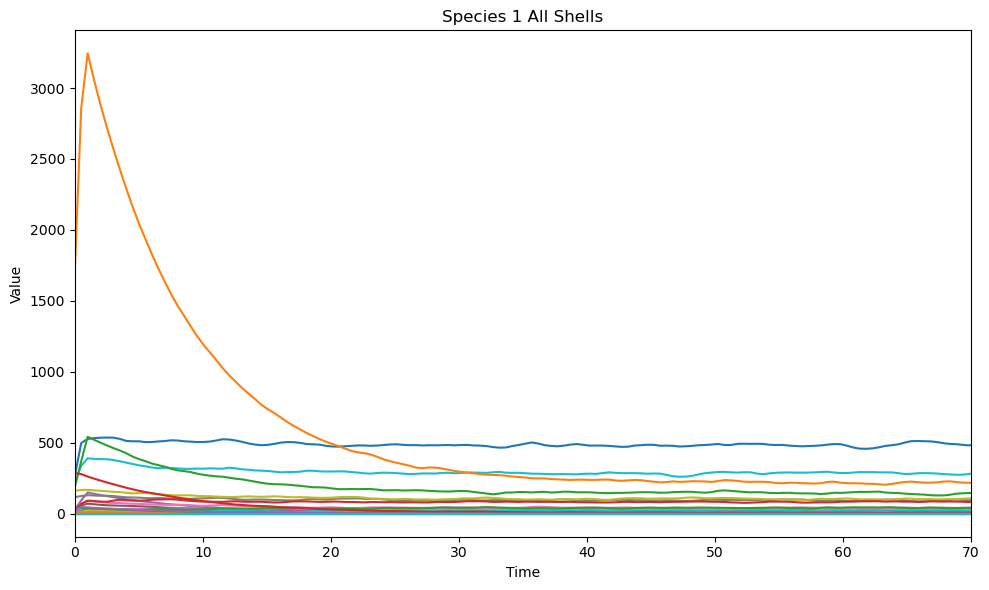

In [247]:
plt.figure(figsize=(10, 6))

# Assuming output.y has a shape of (n_variables, n_time_points)
# Loop over the first 40 variables (or species shells)
for i in range(0, 40):
    plt.plot(output.t, output.y[i], label=f'Species Shell {i+1}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Species 1 All Shells')
plt.xlim(0, 70)

# Optional: Create a legend outside the plot
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [216]:
scenario_properties.collision_pairs[0].phi

array([1.51592799913287e-7*pi, 1.50222610304633e-7*pi,
       1.48870914010572e-7*pi, 1.47537379719138e-7*pi,
       1.46221683504677e-7*pi, 1.44923508631127e-7*pi,
       1.43642545361369e-7*pi, 1.4237849077245e-7*pi,
       1.4113104857649e-7*pi, 1.39899928947046e-7*pi,
       1.38684848350737e-7*pi, 1.37485529384006e-7*pi,
       1.36301700614755e-7*pi, 1.35133096428773e-7*pi,
       1.33979456880723e-7*pi, 1.32840527549573e-7*pi,
       1.31716059398321e-7*pi, 1.30605808637837e-7*pi,
       1.29509536594722e-7*pi, 1.28427009583029e-7*pi,
       1.27357998779709e-7*pi, 1.26302280103697e-7*pi,
       1.25259634098455e-7*pi, 1.24229845817936e-7*pi,
       1.23212704715778e-7*pi, 1.22208004537689e-7*pi,
       1.2121554321687e-7*pi, 1.20235122772412e-7*pi,
       1.19266549210555e-7*pi, 1.18309632428716e-7*pi,
       1.17364186122199e-7*pi, 1.1643002769351e-7*pi,
       1.15506978164195e-7*pi, 1.14594862089093e-7*pi,
       1.13693507472969e-7*pi, 1.12802745689427e-7*pi,
       1.11922

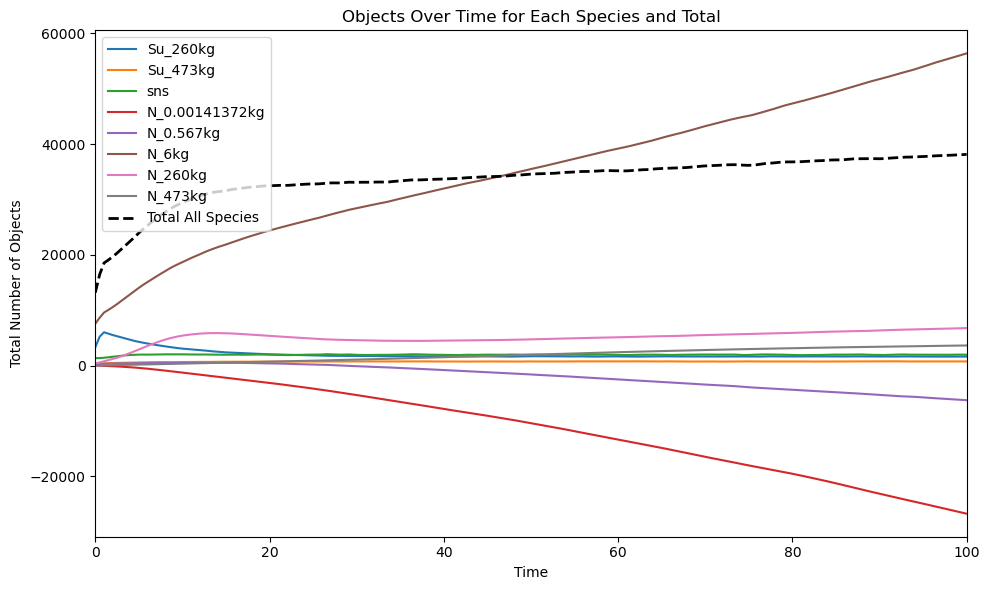

In [248]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming scenario_properties.species_names is available
species_names = scenario_properties.species_names

plt.figure(figsize=(10, 6))

# Assuming output.y's shape is (n_variables, n_time_points) and is ordered by species
num_species = len(species_names)
num_shells = 40  # Number of shells per species

# Initialize an array to hold the total number of objects at each time point
total_objects_all_species = np.zeros_like(output.t)

# Sum and plot for each species, using species names for labels
for i in range(num_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)  # Sum along the vertical axis
    plt.plot(output.t, total_objects_per_species, label=f'{species_names[i]}')
    
    # Add to the total objects count
    total_objects_all_species += total_objects_per_species

# Plot the total sum line
plt.plot(output.t, total_objects_all_species, label='Total All Species', color='k', linewidth=2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time for Each Species and Total')
plt.xlim(0, max(output.t))
# Adjust the ylim based on the range of total_objects_all_species if necessary
# plt.ylim(0, np.max(total_objects_all_species) * 1.1)

plt.legend()
plt.tight_layout()
plt.show()


In [249]:
scenario_properties.x0

,Su_260kg,Su_473kg,sns,N_0.00141372kg,N_0.567kg,N_6kg,N_260kg,N_473kg
alt_bin,,,,,,,,
0,2,0,0,0,0,2,0,0
1,2,0,1,0,0,2,0,0
2,11,0,1,0,0,6,0,0
3,14,1,1,0,1,10,1,1
4,30,0,16,0,3,13,1,0
5,43,0,9,0,5,37,1,0
6,44,2,11,0,5,45,0,1
7,117,3,7,0,3,58,5,0
8,161,4,17,0,2,86,6,0


IndexError: index 3 is out of bounds for axis 0 with size 3

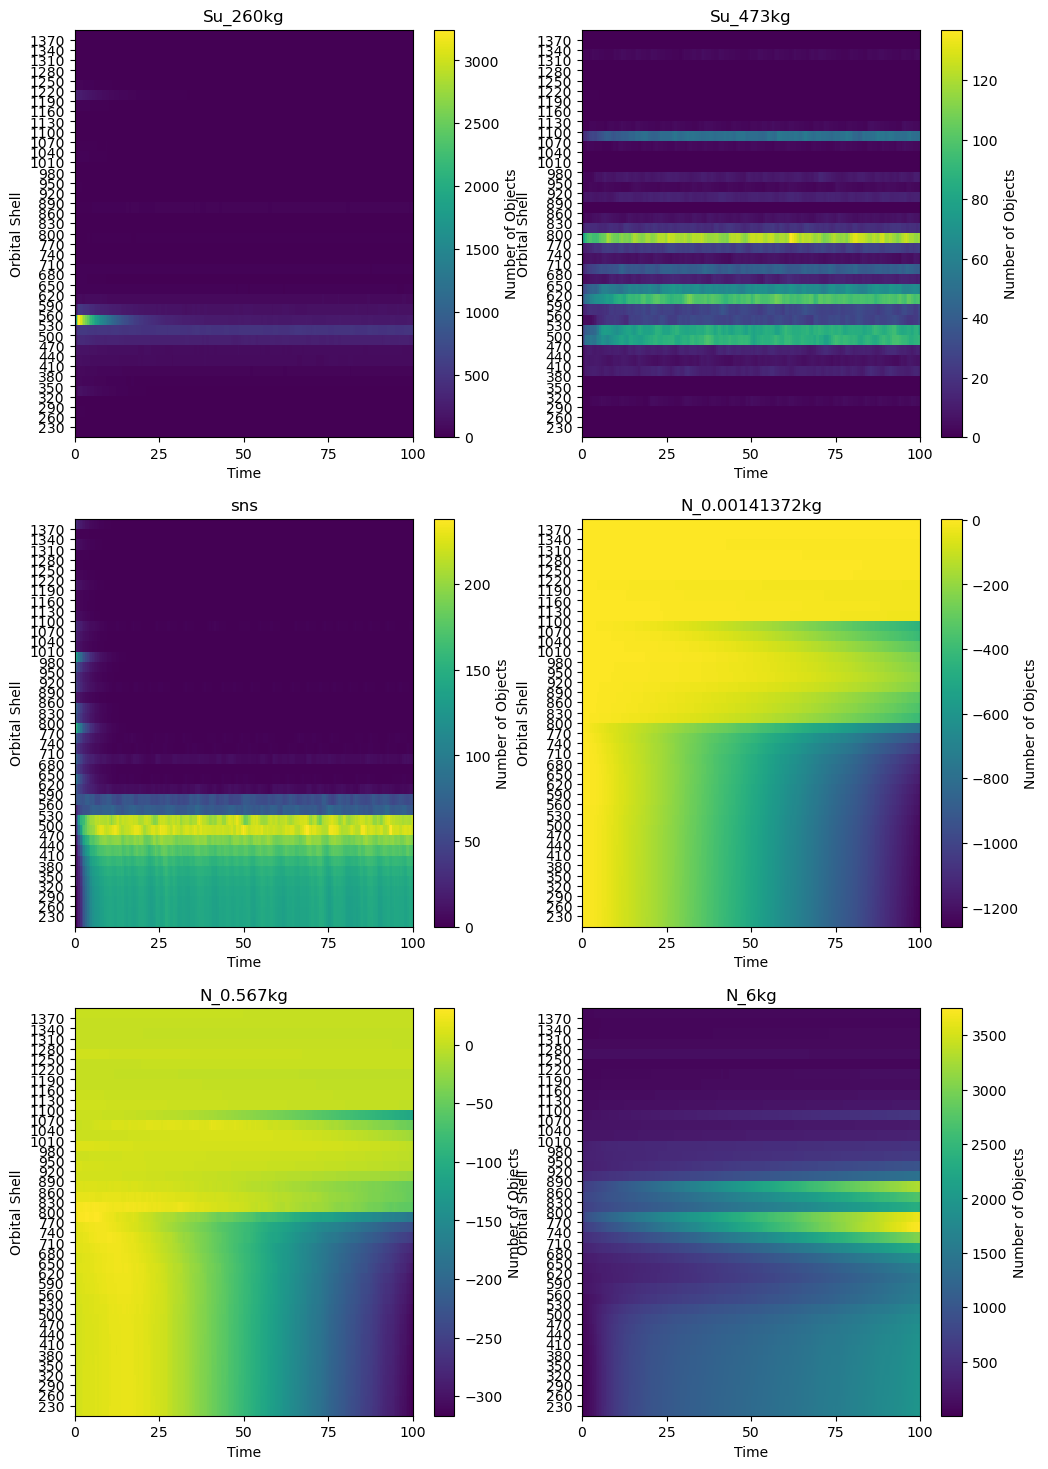

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming scenario_properties.species_names is available
species_names = scenario_properties.species_names
num_species = len(species_names)
num_shells = 40  # Assuming this is constant for all species
n_time_points = len(output.t)

# Set up the figure and axes for a 3x2 grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for i, species_name in enumerate(species_names):
    # Calculate the position in the grid
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Extract the data for the current species across all shells
    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    data_per_species = output.y[start_idx:end_idx, :]
    
    # Plotting the heatmap
    cax = ax.imshow(data_per_species, aspect='auto', origin='lower',
               extent=[output.t[0], output.t[-1], 0, num_shells],
               interpolation='nearest')
    fig.colorbar(cax, ax=ax, label='Number of Objects')
    ax.set_xlabel('Time')
    ax.set_ylabel('Orbital Shell')
    ax.set_title(f'{species_name}')
    ax.set_xticks(np.linspace(output.t[0], output.t[-1], num=5))  # Adjust based on preference
    ax.set_yticks(range(1, num_shells))
    ax.set_yticklabels([f'{alt:.0f}' for alt in scenario_properties.R0_km[1:40]])

# Adjust layout
plt.tight_layout()

# Hide any unused subplot areas if the number of species is less than the number of subplot slots
if num_species < 6:
    for i in range(num_species, 6):
        fig.delaxes(axs.flatten()[i])

plt.show()

In [272]:
for i in scenario_properties.collision_pairs:
    print(i.catastrophic)

data

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True,

array([3.08111518339917e-7*pi, 3.05326615620412e-7*pi,
       3.02579300459428e-7*pi, 2.99868899467249e-7*pi,
       2.97194754266794e-7*pi, 2.94556221093788e-7*pi,
       2.91952670409266e-7*pi, 2.89383486524021e-7*pi,
       2.86848067234593e-7*pi, 2.84345823470358e-7*pi,
       2.81876178951302e-7*pi, 2.79438569856247e-7*pi,
       2.77032444500974e-7*pi, 2.74657263026079e-7*pi,
       2.72312497094123e-7*pi, 2.69997629595778e-7*pi,
       2.67712154364729e-7*pi, 2.65455575900934e-7*pi,
       2.63227409102042e-7*pi, 2.61027179002673e-7*pi,
       2.58854420521261e-7*pi, 2.56708678214291e-7*pi,
       2.5458950603758e-7*pi, 2.52496467114484e-7*pi,
       2.50429133510706e-7*pi, 2.48387086015543e-7*pi,
       2.46369913929362e-7*pi, 2.4437721485707e-7*pi,
       2.42408594507434e-7*pi, 2.40463666498017e-7*pi,
       2.38542052165565e-7*pi, 2.36643380381693e-7*pi,
       2.34767287373695e-7*pi, 2.3291341655026e-7*pi,
       2.31081418332038e-7*pi, 2.29270949986817e-7*pi,
       2.2748